In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

C:\Users\capoma\AppData\Local\Temp\ipykernel_16452\877008696.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
path = 'datasets/'
file = 'df_embar.xlsx'

df_embar = pd.read_excel(path + file)
df_embar.head()

Descrip Planta Fecha Produccion    Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad
0            ILO       2018-04-01  CE-29556-PM            9.0   2018-04-01    16:50:58  2018-04-01   00:10:00    106.240       Tercera
1            ILO       2018-04-01  HO-21106-PM            9.0   2018-04-01    18:40:44  2018-04-01   01:00:00     87.295       Tercera
2            ILO       2018-04-04  CE-13954-PM            9.0   2018-04-04    19:33:45  2018-04-04   06:10:00     30.665       Tercera
3            ILO       2018-04-04  CE-41816-PM            9.0   2018-04-04    19:33:26  2018-04-04   06:10:00     51.350       Tercera
4            ILO       2018-04-04  CO-11074-PM            9.0   2018-04-04    19:34:02  2018-04-04   06:10:00     10.125       Tercera

In [4]:
df_embar['Matricula'] = (
            df_embar['Matricula']
            .str.split(r"-", n=-1, expand=True)
            .loc[:, 1]
            .to_numpy()
        )

df_embar.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad
0            ILO       2018-04-01     29556            9.0   2018-04-01    16:50:58  2018-04-01   00:10:00    106.240       Tercera
1            ILO       2018-04-01     21106            9.0   2018-04-01    18:40:44  2018-04-01   01:00:00     87.295       Tercera
2            ILO       2018-04-04     13954            9.0   2018-04-04    19:33:45  2018-04-04   06:10:00     30.665       Tercera
3            ILO       2018-04-04     41816            9.0   2018-04-04    19:33:26  2018-04-04   06:10:00     51.350       Tercera
4            ILO       2018-04-04     11074            9.0   2018-04-04    19:34:02  2018-04-04   06:10:00     10.125       Tercera

In [5]:
file = 'df_prio_embar.xlsx'
df_master_ep = pd.read_excel(path + file, converters={"Matricula": str})
df_master_ep.head()

Orden           Embarc Matricula         Tipo    CBOD
0      1        SAN JUDAS      0254  3 Exclusivo  389.83
1      2          COQUI X     28225  3 Exclusivo  388.94
2      3        COQUI XII     11074  3 Exclusivo  353.77
3      4  CARMEN JUDITH 1     10437  3 Exclusivo  349.71
4      5     SAN JUDAS II     41816  3 Exclusivo  339.00

In [6]:

df_embar_merged = pd.merge(df_embar, df_master_ep, on='Matricula', how='left')
df_embar_merged.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  Orden           Embarc         Tipo    CBOD
0            ILO       2018-04-01     29556            9.0   2018-04-01    16:50:58  2018-04-01   00:10:00    106.240       Tercera    148  CRISTO REDENTOR      3 Otros  101.14
1            ILO       2018-04-01     21106            9.0   2018-04-01    18:40:44  2018-04-01   01:00:00     87.295       Tercera    155          VANESSA      3 Otros   97.40
2            ILO       2018-04-04     13954            9.0   2018-04-04    19:33:45  2018-04-04   06:10:00     30.665       Tercera     26         COQUI VI  3 Exclusivo  210.72
3            ILO       2018-04-04     41816            9.0   2018-04-04    19:33:26  2018-04-04   06:10:00     51.350       Tercera      5     SAN JUDAS II  3 Exclusivo  339.00
4            ILO       2018-04-04     11074            9.0   2018-04-04    19:34:02  2018-04-04   06:10:00     10.125       Tercera      3        COQUI XII  3 Exclusivo  353.77

In [7]:
mask = df_embar_merged['Descrip Planta'].isin(['CHIMBOTE', 'SAMANCO', 'SUPE', 'PISCO SUR', 'CALLAO',  'VEGUETA', 'MALABRIGO'])
df_embar_merged = df_embar_merged[mask]
df_embar_merged.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  Orden     Embarc             Tipo     CBOD
5       CHIMBOTE       2018-04-07     17361            3.0   2018-04-07    20:30:00  2018-04-07   00:52:00    202.720        Propia      8    TASA 59  Propio con Frio  570.004
6       CHIMBOTE       2018-04-07      6239            3.0   2018-04-07    21:32:00  2018-04-07   01:32:00    153.825        Propia      8   TASA 424  Propio sin Frio  412.910
7        SAMANCO       2018-04-07     18294            3.0   2018-04-07    20:40:00  2018-04-07   01:03:00    341.720        Propia     13    TASA 42  Propio con Frio  485.400
8           SUPE       2018-04-07     20777            5.0   2018-04-07    18:40:00  2018-04-07   06:30:00    451.985        Propia      3    TASA 52  Propio con Frio  604.539
9       CHIMBOTE       2018-04-07     29416            3.0   2018-04-08    00:29:05  2018-04-06   22:00:00     31.935       Tercera     11  MACABI 10      3 Exclusivo  296.850

In [8]:
df_embar_merged['Fecha Produccion'] = pd.to_datetime(df_embar_merged['Fecha Produccion'])
df_embar_merged.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  Orden     Embarc             Tipo     CBOD
5       CHIMBOTE       2018-04-07     17361            3.0   2018-04-07    20:30:00  2018-04-07   00:52:00    202.720        Propia      8    TASA 59  Propio con Frio  570.004
6       CHIMBOTE       2018-04-07      6239            3.0   2018-04-07    21:32:00  2018-04-07   01:32:00    153.825        Propia      8   TASA 424  Propio sin Frio  412.910
7        SAMANCO       2018-04-07     18294            3.0   2018-04-07    20:40:00  2018-04-07   01:03:00    341.720        Propia     13    TASA 42  Propio con Frio  485.400
8           SUPE       2018-04-07     20777            5.0   2018-04-07    18:40:00  2018-04-07   06:30:00    451.985        Propia      3    TASA 52  Propio con Frio  604.539
9       CHIMBOTE       2018-04-07     29416            3.0   2018-04-08    00:29:05  2018-04-06   22:00:00     31.935       Tercera     11  MACABI 10      3 Exclusivo  296.850

In [9]:
dict_temporada_dates = {
    '2018-I':[2018, 3, 6, 2018, 8, 31],
    '2018-II':[2018, 11, 6, 2019, 1, 31],
    '2019-I':[2019, 3, 6, 2019, 7, 31],
    '2019-II':[2019, 11, 6, 2020, 1, 31],
    '2020-I':[2020, 5, 13, 2020, 7, 31],
    '2020-II':[2020, 11, 12, 2021, 1, 31],
    '2021-I':[2021, 4, 23, 2021, 8, 31],
    '2021-II':[2021, 11, 12, 2022, 1, 31],
    '2022-I':[2022, 5, 4, 2022, 7, 31],
    '2022-II':[2022, 11, 15, 2023, 2, 10],
}
import datetime
TEMPORADA_NAME = 'TEMPORADA_NORTE'
DATE_NAME = 'Fecha Produccion'
PLANT_NAME = 'Descrip Planta'
df_embar_merged[TEMPORADA_NAME] = np.nan

temporadas = dict_temporada_dates.keys()

df_final = pd.DataFrame()

for temporada in temporadas:
    list_dates = dict_temporada_dates[temporada]
    start_date = datetime.date(list_dates[0], list_dates[1], list_dates[2])
    end_date   = datetime.date(list_dates[3], list_dates[4], list_dates[5])
    mask = (pd.to_datetime(df_embar_merged[DATE_NAME]).dt.date >= start_date) & (pd.to_datetime(df_embar_merged[DATE_NAME]).dt.date <= end_date)
    df_embar_merged.loc[mask, TEMPORADA_NAME] = temporada

In [11]:
df_embar_merged.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  Orden     Embarc             Tipo     CBOD TEMPORADA_NORTE
5       CHIMBOTE       2018-04-07     17361            3.0   2018-04-07    20:30:00  2018-04-07   00:52:00    202.720        Propia      8    TASA 59  Propio con Frio  570.004          2018-I
6       CHIMBOTE       2018-04-07      6239            3.0   2018-04-07    21:32:00  2018-04-07   01:32:00    153.825        Propia      8   TASA 424  Propio sin Frio  412.910          2018-I
7        SAMANCO       2018-04-07     18294            3.0   2018-04-07    20:40:00  2018-04-07   01:03:00    341.720        Propia     13    TASA 42  Propio con Frio  485.400          2018-I
8           SUPE       2018-04-07     20777            5.0   2018-04-07    18:40:00  2018-04-07   06:30:00    451.985        Propia      3    TASA 52  Propio con Frio  604.539          2018-I
9       CHIMBOTE       2018-04-07     29416            3.0   2018-04-08    00:29:05  2018-04-06   22:00:00     31.935       Tercera     11  MACABI 10      3 Exclusivo  296.850          2018-I

In [14]:
df_embar_merged['Tipo'].value_counts(dropna=False)

Propio sin Frio    9036
3 Exclusivo        8572
Propio con Frio    5387
3 Preferente       3258
3 Eventual         2359
3 Otros            2111
Name: Tipo, dtype: int64

In [20]:
df_embar_merged.groupby(['TEMPORADA_NORTE', 'Tipo'], as_index=False).agg(
    EPS_UNICAS=('Matricula', 'nunique'),
    PEZCA_DESCARGADA_TOTAL=('Pesc Desc', 'sum'),
    PEZCA_DESCARGADA_PROM=('Pesc Desc', 'mean'),
)

TEMPORADA_NORTE             Tipo  EPS_UNICAS  PEZCA_DESCARGADA_TOTAL  PEZCA_DESCARGADA_PROM
0           2018-I       3 Eventual          15               13806.115              57.050062
1           2018-I      3 Exclusivo          37              147444.600             127.990104
2           2018-I          3 Otros          57               43647.200              77.388652
3           2018-I     3 Preferente          18               36208.445              67.553069
4           2018-I  Propio con Frio          19              217789.485             301.647486
5           2018-I  Propio sin Frio          29              224575.515             182.730281
6          2018-II       3 Eventual           9                4924.980              60.060732
7          2018-II      3 Exclusivo          36               89592.480             129.468902
8          2018-II          3 Otros          46               14633.365              67.747060
9          2018-II     3 Preferente          18               22845.430              68.604895
10         2018-II  Propio con Frio          19              146955.284             256.019659
11         2018-II  Propio sin Frio          29              123895.610             157.028657
12          2019-I       3 Eventual          15               11626.305              58.423643
13          2019-I      3 Exclusivo          35               87959.580              99.727415
14          2019-I          3 Otros          38               12717.195              63.269627
15          2019-I     3 Preferente          16               21424.420              64.144970
16          2019-I  Propio con Frio          19              167251.885             243.452525
17          2019-I  Propio sin Frio          29              111842.195             118.981059
18         2019-II       3 Eventual          21               16923.305              45.987242
19         2019-II      3 Exclusivo          36               62591.250              85.158163
20         2019-II          3 Otros          46               13145.690              53.221417
21         2019-II     3 Preferente          18               18139.425              54.967955
22         2019-II  Propio con Frio          19               64381.585             182.384093
23         2019-II  Propio sin Frio          29               60083.715              97.380413
24          2020-I       3 Eventual          16               12935.810              66.337487
25          2020-I      3 Exclusivo          32              115702.710             134.538035
26          2020-I          3 Otros          37               12869.050              82.493910
27          2020-I     3 Preferente          15               23123.450              77.595470
28          2020-I  Propio con Frio          19              165163.550             318.848552
29          2020-I  Propio sin Frio          21              163937.485             206.730750
30         2020-II       3 Eventual          18               21631.610              56.332318
31         2020-II      3 Exclusivo          36              138367.655             102.570537
32         2020-II          3 Otros          26               11718.825              54.253819
33         2020-II     3 Preferente          17               27227.925              65.138577
34         2020-II  Propio con Frio          19              148031.715             226.348188
35         2020-II  Propio sin Frio          29              176019.585             118.531707
36          2021-I       3 Eventual          20               18884.605              61.313653
37          2021-I      3 Exclusivo          36              119661.515             116.063545
38          2021-I          3 Otros          34                8666.055              74.707371
39          2021-I     3 Preferente          16               24355.250              72.919910
40          2021-I  Propio con Frio          19              192407.470             293.304070
41          2

In [11]:
mask = df_embar_merged['CBOD'].isna()
df_embar_merged.loc[mask, 'Tipo'] = 'No Registrado'

In [24]:
df_embar_merged.loc[mask, :]

Empty DataFrame
Columns: [Descrip Planta, Fecha Produccion, Matricula, Zona de Pesca, Fecha Arribo, Hora Arribo, Fecha Zarpe, Hora Zarpe, Pesc Desc, Ind Propiedad, Orden, Embarc, Tipo, CBOD, TEMPORADA_NORTE]
Index: []

In [13]:
# df_embar_merged.loc[mask, 'Matricula'].to_excel('outputs/df_embar_merged_no_registrado.xlsx')

In [11]:
df_embar_merged.head()

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  Orden     Embarc             Tipo     CBOD TEMPORADA_NORTE
5       CHIMBOTE       2018-04-07     17361            3.0   2018-04-07    20:30:00  2018-04-07   00:52:00    202.720        Propia    8.0    TASA 59  Propio con Frio  570.004          2018-I
6       CHIMBOTE       2018-04-07      6239            3.0   2018-04-07    21:32:00  2018-04-07   01:32:00    153.825        Propia    8.0   TASA 424  Propio sin Frio  412.910          2018-I
7        SAMANCO       2018-04-07     18294            3.0   2018-04-07    20:40:00  2018-04-07   01:03:00    341.720        Propia   13.0    TASA 42  Propio con Frio  485.400          2018-I
8           SUPE       2018-04-07     20777            5.0   2018-04-07    18:40:00  2018-04-07   06:30:00    451.985        Propia    3.0    TASA 52  Propio con Frio  604.539          2018-I
9       CHIMBOTE       2018-04-07     29416            3.0   2018-04-08    00:29:05  2018-04-06   22:00:00     31.935       Tercera   11.0  MACABI 10      3 Exclusivo  296.850          2018-I

In [14]:
df_embar_merged.groupby(['TEMPORADA_NORTE'])['CBOD'].count().mean()

3398.222222222222

In [35]:
# df_embar_merged.to_excel('outputs/df_embar_merged_analysis_eps_all.xlsx')

In [34]:
mask = df_embar_merged['CBOD'].isna()
df_embar_merged.loc[mask, 'Matricula'].unique()

array(['65512', '2777', '66639', '6331', '0232', '19893', '6408', '5300',
       '9905', '64389', '19842', '18813', '29219', '43113', '67073',
       '64083', '65660', '54871', '11391', '50331', '12234', '63626',
       '12075', '18644', '15261', '16661', '13681'], dtype=object)

<Figure size 1224x720 with 0 Axes>

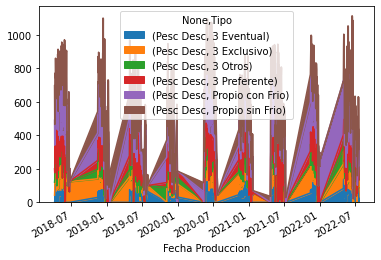

In [24]:
from matplotlib.pyplot import figure

figure(figsize=(17, 10))

pt = pd.pivot_table(df_embar_merged, columns=['Tipo'], index=['Fecha Produccion'], values=['Pesc Desc'])
pt.plot.area()
plt.show()

In [19]:
df_embar_merged['Descrip Planta'].unique()

array(['CHIMBOTE', 'SAMANCO', 'SUPE', 'PISCO SUR', 'CALLAO', 'VEGUETA',
       'MALABRIGO'], dtype=object)

In [20]:
mask = df_embar_merged['CBOD'].isna()
df_embar_merged[mask]

Descrip Planta Fecha Produccion Matricula  Zona de Pesca Fecha Arribo Hora Arribo Fecha Zarpe Hora Zarpe  Pesc Desc Ind Propiedad  Orden Embarc Tipo  CBOD
29525         CALLAO       2022-05-04     65512            5.0   04/05/2022       20:38  04/05/2022      01:00     82.605       Tercera    NaN    NaN  NaN   NaN
29586         CALLAO       2022-05-05     65512            5.0   05/05/2022       16:11  05/05/2022      00:30     92.630       Tercera    NaN    NaN  NaN   NaN
29596           SUPE       2022-05-05      2777            4.0   05/05/2022       18:10  05/05/2022      02:00    176.880       Tercera    NaN    NaN  NaN   NaN
29644        VEGUETA       2022-05-06     66639            4.0   05/05/2022       14:34  05/05/2022      01:00     59.580       Tercera    NaN    NaN  NaN   NaN
29669         CALLAO       2022-05-06     65512            5.0   06/05/2022       12:44  06/05/2022      02:30     98.720       Tercera    NaN    NaN  NaN   NaN
...              ...              ...       ...            ...          ...         ...         ...        ...        ...           ...    ...    ...  ...   ...
33408         CALLAO       2022-07-13     66639            5.0   13/07/2022       11:10  13/07/2022      00:12     89.520       Tercera    NaN    NaN  NaN   NaN
33451         CALLAO       2022-07-14     66639            5.0   14/07/2022       14:54  14/07/2022      00:41     96.090       Tercera    NaN    NaN  NaN   NaN
33513         CALLAO       2022-07-19     66639            5.0   19/07/2022       13:31  18/07/2022      22:00     77.190       Tercera    NaN    NaN  NaN   NaN
33538       CHIMBOTE       2022-07-20      6331            3.0   20/07/2022       18:31  18/07/2022      20:00    101.051       Tercera    NaN    NaN  NaN   NaN
33577         CALLAO       2022-07-20     66639            5.0   20/07/2022       16:33  19/07/2022      23:00     97.065       Tercera    NaN    NaN  NaN   NaN

[139 rows x 14 columns]

In [21]:
df_embar_merged.loc[mask, 'Matricula'].nunique()

27

In [16]:
df_embar_merged.loc[mask, 'Pesc Desc'].sum()

13129.595